In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [6]:
# now we will check that is there relationship between height nad weight

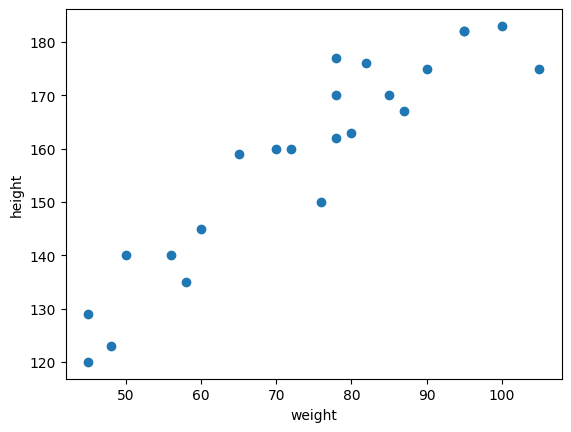

In [9]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [19]:
# divide the daata into x and y
x=df[['Weight']]
y=df.Height

In [11]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
x_test

,Weight
20,45
17,65
3,60
13,100
19,87


In [14]:
x_train

16     50
10     82
4      70
2      48
18     76
6      80
7      90
1      58
14     85
0      45
15     78
22     72
21     56
9      78
8      95
12    105
11     95
5      78
Name: Weight, dtype: int64

In [30]:
# doing scaling we should not do sclaing on test data 
# we do not do do fit_tranform on test data as it is call it as data leakage

In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [35]:
x_train

,Weight
16,50
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45


In [40]:
# scaling should be done after train_test_split
# avoid scaling categorical features
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


In [41]:
x_train

array([[-1.4611864 ],
       [ 0.44730196],
       [-0.26838118],
       [-1.58046693],
       [ 0.08946039],
       [ 0.32802144],
       [ 0.92442405],
       [-0.98406431],
       [ 0.62622274],
       [-1.75938771],
       [ 0.20874091],
       [-0.14910065],
       [-1.10334484],
       [ 0.20874091],
       [ 1.22262536],
       [ 1.81902797],
       [ 1.22262536],
       [ 0.20874091]])

In [42]:
x_test

array([[-1.75938771],
       [-0.56658248],
       [-0.86478379],
       [ 1.52082666],
       [ 0.74550327]])

In [43]:
# scaling doesnot affect the data taht is why it is optional but this helps us reducing the use of computation power

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model=LinearRegression()

In [46]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
model.coef_

array([17.73635106])

In [49]:
model.intercept_

np.float64(158.88888888888889)

In [50]:
y_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,y_pred)

28.276946048811972

In [53]:
r2_score(y_test,y_pred)

0.9171832648523548

In [54]:
error=y_test-y_pred

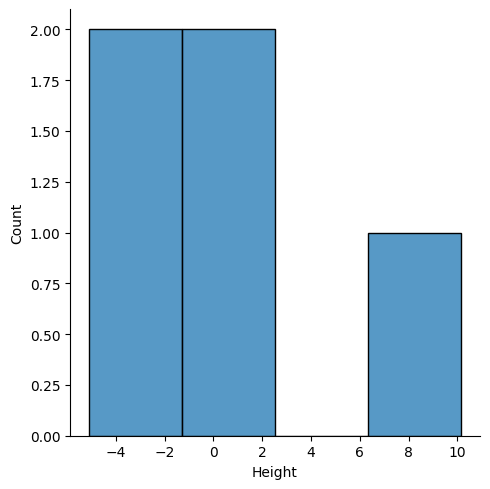

In [55]:
sns.displot(error)